In [270]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [271]:
#path_without_outliers = 'dataset/corporacion-favorit/'
df = pd.read_csv('dataset/corporacion-favorit/store44.csv', index_col='date', parse_dates=True)
#df_wo_groc = pd.read_csv(path_without_outliers + 'GROCERYI_sem_outliers.csv', index_col='date', parse_dates=True)
df.head()


,id,store_nbr,family,quantity,onpromotion
date,,,,,
2013-01-02,3036,44,AUTOMOTIVE,16.000,0
2013-01-02,3068,44,SEAFOOD,150.367,0
2013-01-02,3065,44,PREPARED FOODS,616.862,0
2013-01-02,3064,44,POULTRY,1034.765,0
2013-01-02,3061,44,PERSONAL CARE,716.000,0


In [272]:
min(df.index)
max(df.index)
i = int(0.6 * len(df.index))
df.iloc[i]


id              1943641
store_nbr            44
family         CLEANING
quantity         2840.0
onpromotion           4
Name: 2015-12-30 00:00:00, dtype: object

# Chamando os modelos

- ARIMA
- Suavização exponencial

In [ ]:
# para calcular métricas

def metricas(y_true, y_pred):

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'R2: {r2}')

    return mse, rmse, mape, r2

In [273]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [288]:
def calling_arima(df,family, order=(1,1,1)):
    fdf = df[df['family'] == family].copy()
    fdf = fdf.asfreq('ME')
    
    #X = fdf.drop(columns={'id','store_nbr','family'})
    y = pd.to_numeric(fdf['quantity'], errors='coerce')

    #X_train = X[X.index < '2016-10-24']
    #X_test = X[X.index >= '2016-10-24']
    y_train = y[y.index < '2016-10-24']
    y_test = y[y.index >= '2016-10-24']

    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(y_test))


    return y_test, predictions


def compare_arima(df, y_test, predictions):

    df_compare = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': predictions.values
        }, index=y_test.index)
    
    plt.plot(df.index, df['quantity'], label='Dados Reais', color='blue')
    plt.plot(df_compare.index, df_compare['y_test'], label='Dados Reais', color='blue')
    plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

In [281]:
family = 'GROCERY I'
# produtos_mv[0]
y_test, y_pred = calling_arima(df, family)
compare_arima(df, y_test, y_pred)


MSE: 6680530.038703894
RMSE: 2584.672133695857
MAPE: 0.1421538271703079
R²: -0.9619374491925257


In [282]:
predictions.values

array([ 9450.01432121, 10428.63515307,  9081.66688071,  9530.73359974,
        9932.93767434,  9238.50479795,  9527.22467196,  9678.38539434,
        9326.27534565])

In [283]:
df_compare = pd.DataFrame({
    'y_test': y_test.values,
    'y_pred': predictions.values
}, index=y_test.index)

In [284]:
df_compare 

,y_test,y_pred
date,,
2016-11-30,11083.0,9450.014321
2016-12-31,11226.0,10428.635153
2017-01-31,8936.0,9081.666881
2017-02-28,14400.0,9530.733600
2017-03-31,12173.0,9932.937674
2017-04-30,14442.0,9238.504798
2017-05-31,9829.0,9527.224672
2017-06-30,10411.0,9678.385394
2017-07-31,9934.0,9326.275346


In [285]:
df

,id,store_nbr,family,quantity,onpromotion
date,,,,,
2013-01-02,3036,44,AUTOMOTIVE,16.000,0
2013-01-02,3068,44,SEAFOOD,150.367,0
2013-01-02,3065,44,PREPARED FOODS,616.862,0
2013-01-02,3064,44,POULTRY,1034.765,0
2013-01-02,3061,44,PERSONAL CARE,716.000,0
...,...,...,...,...,...
2017-08-15,3000362,44,BEAUTY,9.000,1
2017-08-15,3000360,44,AUTOMOTIVE,15.000,0
2017-08-15,3000391,44,SCHOOL AND OFFICE SUPPLIES,345.000,12


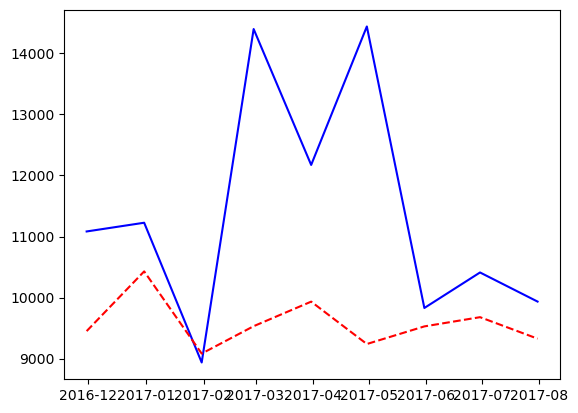

In [287]:

plt.plot(df_compare.index, df_compare['y_test'], label='Dados Reais', color='blue')

# Plotar as previsões
plt.plot(df_compare.index, df_compare['y_pred'], label='Previsões', color='red', linestyle='--')

Prophet (exemplo)

In [ ]:
from prophet import Prophet

In [ ]:
# Instalar o Prophet
!pip install prophet

# Importar bibliotecas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
df = df.rename(columns = {"date":"ds","quantity":"y"})
#df = pd.DataFrame(data)
df = df[df['family'] == 'GROCERY I']

# Criar e ajustar o modelo Prophet
model = Prophet()
model.fit(df)

# Criar um DataFrame com as datas futuras
future = model.make_future_dataframe(periods=12, freq = 'M')  # Prever 30 dias no futuro

# Fazer previsões
forecast = model.predict(future)

# Plotar os resultados
fig = model.plot(forecast)
plt.show()

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
df

,id,store_nbr,family,quantity,onpromotion
date,,,,,
2013-01-02,3036,44,AUTOMOTIVE,16.000,0
2013-01-02,3068,44,SEAFOOD,150.367,0
2013-01-02,3065,44,PREPARED FOODS,616.862,0
2013-01-02,3064,44,POULTRY,1034.765,0
2013-01-02,3061,44,PERSONAL CARE,716.000,0
...,...,...,...,...,...
2017-08-15,3000362,44,BEAUTY,9.000,1
2017-08-15,3000360,44,AUTOMOTIVE,15.000,0
2017-08-15,3000391,44,SCHOOL AND OFFICE SUPPLIES,345.000,12


Suavização exponencial

/home/adriel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adriel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


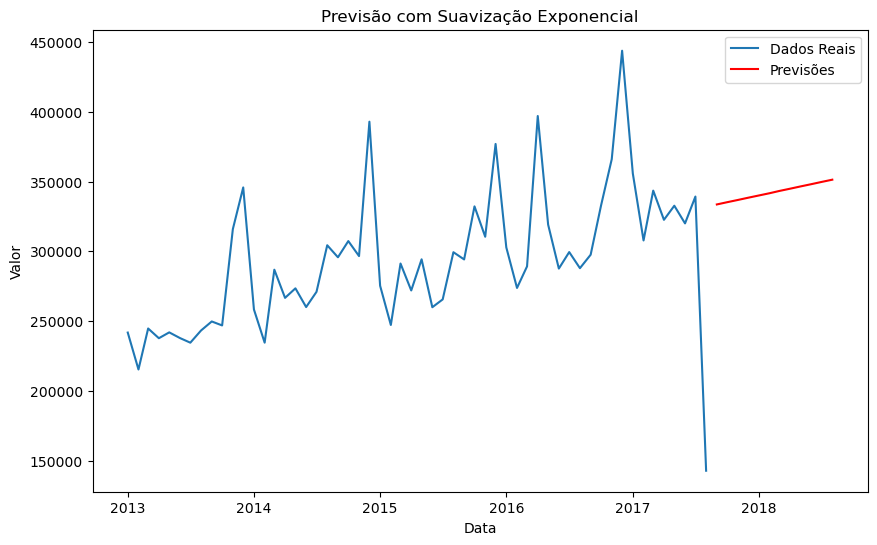

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

family = 'GROCERY I'
# Supondo que a coluna 'date' seja o índice do dataframe
fdf = df[df['family'] == family].copy()
#fdf.set_index('date', inplace=True)  # Definir 'date' como índice
fdf.index = pd.to_datetime(fdf.index)  # Converter para datetime

# Ajustar o modelo Holt-Winters sem sazonalidade
model = ExponentialSmoothing(
    fdf['quantity'],
    trend='add',    # Use 'add' para tendência, ou None se não houver tendência
    seasonal=None   # Como não há sazonalidade, definimos como None
)
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=12)

# Ajustando o índice da previsão para corresponder às datas
#forecast_index = pd.date_range(start=fdf.index[0], periods=30, freq='MS')
#forecast = pd.Series(forecast, index=forecast_index)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(fdf.index, fdf['quantity'], label='Dados Reais')
plt.plot(forecast.index, forecast, label='Previsões', color='red')
plt.legend()
plt.title('Previsão com Suavização Exponencial')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()


/home/adriel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adriel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


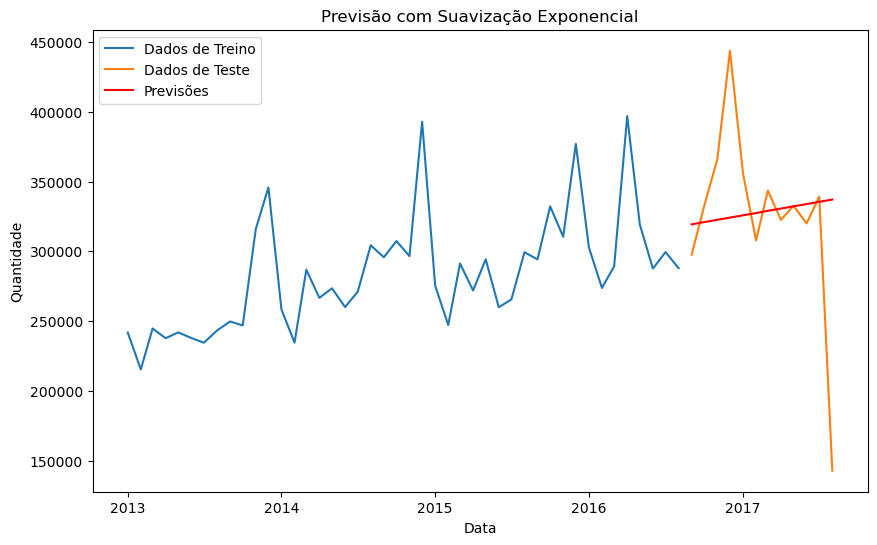

In [ ]:
# Definindo a família que você quer analisar
family = "GROCERY I"

# Filtrando os dados pela família
fdf = df[df['family'] == family].copy()

# Convertendo o índice para datetime
fdf.index = pd.to_datetime(fdf.index)

# Definindo o ponto de corte entre treino e teste (80% treino, 20% teste)
train_size = int(len(fdf) * 0.8)
train, test = fdf.iloc[:train_size], fdf.iloc[train_size:]

# Ajustando o modelo Holt-Winters no conjunto de treino
model = ExponentialSmoothing(
    train['quantity'],
    trend='add',    # Use 'add' para tendência, ou None se não houver tendência
    seasonal=None   # Como não há sazonalidade, definimos como None
)
model_fit = model.fit()

# Fazer previsões para o período de teste
forecast = model_fit.forecast(steps=len(test))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['quantity'], label='Dados de Treino')
plt.plot(test.index, test['quantity'], label='Dados de Teste')
plt.plot(forecast.index, forecast, label='Previsões', color='red')
plt.legend()
plt.title('Previsão com Suavização Exponencial')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.show()


In [ ]:
forecast

2017-09-01    333580.526652
2017-10-01    335191.376538
2017-11-01    336802.226424
2017-12-01    338413.076310
2018-01-01    340023.926195
2018-02-01    341634.776081
2018-03-01    343245.625967
2018-04-01    344856.475853
2018-05-01    346467.325739
2018-06-01    348078.175624
2018-07-01    349689.025510
2018-08-01    351299.875396
Freq: MS, dtype: float64

In [ ]:
forecast.index

RangeIndex(start=1679, stop=1691, step=1)

In [ ]:
forecast

2013-01-31   NaN
2013-02-28   NaN
2013-03-31   NaN
2013-04-30   NaN
2013-05-31   NaN
2013-06-30   NaN
2013-07-31   NaN
2013-08-31   NaN
2013-09-30   NaN
2013-10-31   NaN
2013-11-30   NaN
2013-12-31   NaN
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
2014-06-30   NaN
2014-07-31   NaN
2014-08-31   NaN
2014-09-30   NaN
2014-10-31   NaN
2014-11-30   NaN
2014-12-31   NaN
2015-01-31   NaN
2015-02-28   NaN
2015-03-31   NaN
2015-04-30   NaN
2015-05-31   NaN
2015-06-30   NaN
Freq: ME, dtype: float64